## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni 
* Blog post URL: TBD


# obtaining data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Import statements go here
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

kc = pd.read_csv('kc_house_data.csv',index_col=None,encoding='latin1')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## retrieve data information

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# scrubbing and cleaning Data

## run timestamp data conversion  

In [3]:
def general_datetime_converter(df, col):
    df_clone = df.copy()
    df_clone[col] = pd.to_datetime(df_clone[col])
    return df_clone

kc2 = general_datetime_converter(kc, 'date')
kc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

## read missing and symbolic values

In [4]:
def check_cols(df):
    for col in df.columns:
        print('------------------------------------------------------')
        print(col)
        print(f'unique values: {df[col].nunique(dropna=False)} (\'NaN\' included)')
        print(f'NaN exists? {df[col].isna().any()}')
        if df[col].isna().any():
            print(f'how many \'NaN\' values? {df[col].isna().sum()} ({np.divide(df[col].isna().sum(),df.shape[0])*100:.2f}%)')
        print('------------------------------------------------------')
        print(df[col].value_counts(dropna=False, normalize=True))
        print('------------------------------------------------------')
        print('\n') # Break up the output between columns
        
    return None

check_cols(kc2)

------------------------------------------------------
id
unique values: 21420 ('NaN' included)
NaN exists? False
------------------------------------------------------
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
------------------------------------------------------


------------------------------------------------------
date
unique values: 372 ('NaN' included)
NaN exists? False
------------------------------------------------------
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64
-------------------

Name: sqft_living15, Length: 777, dtype: float64
------------------------------------------------------


------------------------------------------------------
sqft_lot15
unique values: 8682 ('NaN' included)
NaN exists? False
------------------------------------------------------
5000      0.019771
4000      0.016484
6000      0.013335
7200      0.009724
4800      0.006714
            ...   
11036     0.000046
8989      0.000046
871200    0.000046
809       0.000046
6147      0.000046
Name: sqft_lot15, Length: 8682, dtype: float64
------------------------------------------------------




## remove erratic symbols

In [5]:
# Your code here - Manipulate column names
subs = [(' ','_'),('.',''),("'",""),('®',''),('Â',''),('â\x84¢',''),('+','plus'),('½','half'),('-','_')]

def transform_colname(df):
    df_clone = df.copy()
    cols_rename = []
    for col in df_clone.columns:
        for old, new in subs:
            col = col.replace(old,new)
        cols_rename.append(col)
    df_clone.columns = cols_rename
    return df_clone

In [6]:
def convert_obj_to_num(df, col):
    df_clone = df.copy()
    if df_clone[col].dtype == 'object':
        df_clone[col] = df_clone[col].replace({'?':np.NaN}).astype('float64')
    return df_clone

kc3 = convert_obj_to_num(kc2, 'sqft_basement')
kc3.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## replace missing values

In [7]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(kc3)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	sqft_basement                  contains        454 null values ( 2.10%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### continuous features

In [8]:
def fill_null_cols(df, col, nullified=False):
    df_clone = df.copy()
    if nullified:
        df_clone[col] = df_clone[col].fillna(0)
    else:
        try:
            median = df_clone[col].median()
            mean = df_clone[col].mean()
            print(f'{col}: median {median:.3f}, mean {mean:.3f}')
            if median > 0:
                df_clone[col] = df_clone[col].fillna(median)
            else:
                df_clone[col] = df_clone[col].fillna(mean)
        except:
            print('N/A')
    return df_clone

In [9]:
kc4 = fill_null_cols(kc3, 'sqft_basement', nullified=False)
kc4.sqft_basement.isna().any()

sqft_basement: median 0.000, mean 291.852


False

In [10]:
kc5 = fill_null_cols(kc4, 'yr_renovated', nullified=True)
print(kc5.yr_renovated.isna().any())
kc5.yr_renovated.unique()

False


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### discrete, categorical features

In [11]:
def replace_null_cols(df, col, obj=False):
    df_clone = df.copy()
    if obj:
        df_clone[col] = df_clone[col].fillna('unknown')
    else:
        #df_clone[col] = df_clone[col].fillna(-1)
        # Thomas T. 
        df_clone[col] = df_clone[col].fillna(0)
    return df_clone

In [12]:
kc6 = replace_null_cols(kc5, 'waterfront', obj=False)
kc6.waterfront.isna().any()

False

In [13]:
kc7 = replace_null_cols(kc6, 'view', obj=False)
kc7.view.isna().any()

False

In [14]:
def transform_col_to_binary(df, col):
    df_clone = df.copy()
    df_clone[col+'_korg'] = df_clone[col]
    for idx in range(df_clone.shape[0]):
        if df_clone.loc[idx,col] > 0:
            df_clone.loc[idx,col] = 1
    return df_clone

In [15]:
kc7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [16]:
kc8 = transform_col_to_binary(kc7, 'yr_renovated')
print('any NaN?',kc8.yr_renovated.isna().sum())
print(kc8.yr_renovated.nunique())
print('after:',kc8.yr_renovated.unique())
print('before:',kc8.yr_renovated_korg.unique())

any NaN? 0
2
after: [0. 1.]
before: [   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


## remove duplications

In [17]:
def check_remove_duplicated_data(df):
    df_clone = df.copy()
    #df_clone['is_duplicated'] = df_clone.duplicated(subset=None, keep='first')
    do_drop = '0'
    for col in df_clone.columns:
        print(f'{col} contains duplications?')
        if df_clone[col].duplicated().value_counts(normalize=True, sort=False)[0] == 1:
            print('Nope!')
        else:
            print(f'Yes, how much? {df_clone[col].duplicated().value_counts(normalize=True, sort=False)[1]}')
            do_drop = input('drop? enter 1 (\'True\') or 0 (\'False\')')
            if do_drop == '1':
                df_clone[col+'_kdup'] = df_clone[col]
                #df_clone[col] = df_clone[col].drop_duplicates(keep='first') 
                # Thomas T.
                df_clone[col] = df_clone[col].drop_duplicates(keep='last')
                print(f' duplications in {col} dropped ... ')
            else:
                print(f' skip {col} ... ')
        print('---------------------------------------------------------------------------')
    return df_clone

In [18]:
kc9 = check_remove_duplicated_data(kc8)
kc9.columns

id contains duplications?
Yes, how much? 0.008195582719822198
drop? enter 1 ('True') or 0 ('False')1
 duplications in id dropped ... 
---------------------------------------------------------------------------
date contains duplications?
Yes, how much? 0.9827753854702042
drop? enter 1 ('True') or 0 ('False')0
 skip date ... 
---------------------------------------------------------------------------
price contains duplications?
Yes, how much? 0.832291521970644
drop? enter 1 ('True') or 0 ('False')0
 skip price ... 
---------------------------------------------------------------------------
bedrooms contains duplications?
Yes, how much? 0.9994443672732324
drop? enter 1 ('True') or 0 ('False')0
 skip bedrooms ... 
---------------------------------------------------------------------------
bathrooms contains duplications?
Yes, how much? 0.9986572209103116
drop? enter 1 ('True') or 0 ('False')0
 skip bathrooms ... 
---------------------------------------------------------------------------

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')

## remove extreme outliers

In [19]:
def check_outliers(df):
    df_clone = df.copy()
    cuts = []
    do_work = '0'
    do_cut = '0'
    read_cut = '0'
    
    for col in df_clone.columns:
        print('\n')
        print('***************************************************************************')
        print(f'{col} (data type: {df_clone[col].dtype}):')
        do_work = input('wanna continue? enter 1 (\'True\') or 0 (\'False\')')
        if do_work == '1':    
            print ('----------------------------------------------------------------------')
            print(df_clone[col].value_counts(dropna=False,normalize=True))
            print ('----------------------------------------------------------------------')
            for i in range(80,100):
                q = i/100
                print(f'\t{q} percentile: {df_clone[col].quantile(q=q)}')
            print('-----------------------------------------------------------------------')
            do_cut = input('make cut? enter 1 (\'True\') or 0 (\'False\')')
            if do_cut == '1':
                print(f'\tcut on {col} applied ... ')
                try:
                    print(f'\tcut value: {0.98*df_clone[col].quantile(q=0.99)}')
                    orig_tot = df_clone.shape[0]
                    df_clone = df_clone[df_clone[col]<0.98*df_clone[col].quantile(q=0.99)]
                    print(f'\tPercent removed: {(orig_tot-df_clone.shape[0])/orig_tot}')
                    cuts.append([col,round(0.98*df_clone[col].quantile(q=0.99),3),(orig_tot-df_clone.shape[0])/orig_tot])
                except Exception as e:
                    print('\t\t>>> Sorry! ',e)
            else:
                print(f'\tskip {col} ... ')
                read_cut = input('\tbut... wanna read cut? enter 1 (\'True\') or 0 (\'False\')')
                if read_cut == '1':
                    try:
                        print(f'\tcut value: {0.98*df_clone[col].quantile(q=0.99)}')
                        orig_tot = df_clone.shape[0]
                        df_clone = df_clone[df_clone[col]<0.98*df_clone[col].quantile(q=0.99)]
                        print(f'\tPercent removed: {(orig_tot-df_clone.shape[0])/orig_tot}')
                        cuts.append([col,round(0.98*df_clone[col].quantile(q=0.99),3),(orig_tot-df_clone.shape[0])/orig_tot])
                    except Exception as e:
                        print('\t\t>>> Sorry! ',e)
                    df_clone = df.copy()
                else:
                    cuts.append([col,0.,0.])
        else:
            cuts.append([col,0.,0.])
            continue
        input("Press Enter to continue...")
    return cuts, df_clone

In [21]:
results, kc10 = check_outliers(kc9)
print(kc10.columns)
results



***************************************************************************
id (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
date (data type: datetime64[ns]):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
price (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64
----------------------------------------------------------------------
	0.8 percentile: 700435.9999999998
	0.81 percentile: 718000.0
	0.82 percentile: 730000.72
	0.83 percentile: 749950.0


make cut? enter 1 ('True') or 0 ('False')0
	skip floors ... 
	but... wanna read cut? enter 1 ('True') or 0 ('False')1
	cut value: 2.94
	Percent removed: 0.02861508542853174
Press Enter to continue...


***************************************************************************
waterfront (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64
----------------------------------------------------------------------
	0.8 percentile: 0.0
	0.81 percentile: 0.0
	0.82 percentile: 0.0
	0.83 percentile: 0.0
	0.84 percentile: 0.0
	0.85 percentile: 0.0
	0.86 percentile: 0.0
	0.87 percentile: 0.0
	0.88 percentile: 0.0
	0.89 percentile: 0.0
	0.9 percentile: 0.0
	0.91 percentile: 0.0
	0.92 percentile: 0.0
	0.93 percentile: 0.0
	0.94 percentile: 0.0
	0.95 percentile: 0.0
	0.96 percentile: 0.0
	0.97 percentile: 0.0
	0.98 percentile: 0.0
	0.99 percentile: 0

make cut? enter 1 ('True') or 0 ('False')0
	skip yr_built ... 
	but... wanna read cut? enter 1 ('True') or 0 ('False')1
	cut value: 1973.72
	Percent removed: 0.5102560540815854
Press Enter to continue...


***************************************************************************
yr_renovated (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
zipcode (data type: int64):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
lat (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
long (data type: float64):
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
sqft_living15 (data type: int64):
wanna continue? enter 1 ('True') or 0 ('False')1
-----------

[['id', 0.0, 0.0],
 ['date', 0.0, 0.0],
 ['price', 1568000.0, 0.010742232717507062],
 ['bedrooms', 4.9, 0.015465110895031718],
 ['bathrooms', 3.675, 0.012316525443348613],
 ['sqft_living', 4302.2, 0.010927443626429596],
 ['sqft_lot', 100318.68, 0.01097374635366023],
 ['floors', 1.96, 0.02861508542853174],
 ['waterfront', nan, 1.0],
 ['view', 2.94, 0.014677964532110942],
 ['condition', 3.92, 0.07876093901930824],
 ['grade', 9.8, 0.023197666342547576],
 ['sqft_above', 3851.4, 0.011344168171505301],
 ['sqft_basement', 1401.4, 0.010881140899198963],
 ['yr_built', 1933.54, 0.5102560540815854],
 ['yr_renovated', 0.0, 0.0],
 ['zipcode', 0.0, 0.0],
 ['lat', 0.0, 0.0],
 ['long', 0.0, 0.0],
 ['sqft_living15', 3655.4, 0.01180719544381164],
 ['sqft_lot15', 77747.81, 0.010232902717970088],
 ['yr_renovated_korg', 0.0, 0.032458211788674356],
 ['id_kdup', 0.0, 0.0]]

In [31]:
def remove_outliers(df):
    df_clone = df.copy()
    cuts = []
    do_work = '0'
    do_cut = '0'
    read_cut = '0'
    
    for col in df_clone.columns:
        print('\n')
        print('***************************************************************************')
        print(f'{col} (data type: {df_clone[col].dtype}):')
        print(f'>>>>>> remaining data size {df_clone.shape[0]} wrt {df.shape[0]}')
        print(f'>>>>>> Percent remained (previous cuts applied): {round(df_clone.shape[0]/df.shape[0],3)}')
        do_work = input('wanna continue? enter 1 (\'True\') or 0 (\'False\')')
        if do_work == '1':    
            print ('----------------------------------------------------------------------')
            print(df_clone[col].value_counts(dropna=False,normalize=True))
            print ('----------------------------------------------------------------------')
            q75, q25 = np.percentile(df_clone[col], [75 ,25])
            iqr = q75 - q25
            minVal = q25 - (1.73 * iqr)
            maxVal = q75 + (1.73 * iqr)
            print(f'*** IQR: {iqr:.6f} ********* ') 
            print(f'*** minValue: {minVal:.6f} *** ') 
            print(f'*** maxValue: {maxVal:.6f} *** ')
            print('-----------------------------------------------------------------------')
            do_cut = input('make cut? enter 1 (\'True\') or 0 (\'False\')')
            if (maxVal == minVal) & (do_cut == '1'):
                do_cut = 0
                print('minimal and maximal values are the same. cut not recommended.')
            if do_cut == '1':
                print(f'\tcut on {col} applied ... ')   
                try:
                    orig_tot = df.shape[0]
                    df_cut = df_clone.copy()
                    df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                    df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                    print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                    cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                except Exception as e:
                    print('\t\t>>> Sorry! ',e)
            else:
                print(f'\tskip {col} ... ')
                read_cut = input('\tbut... wanna read cut? enter 1 (\'True\') or 0 (\'False\')')
                if read_cut == '1':
                    try:
                        orig_tot = df_clone.shape[0]
                        df_cut = df_clone.copy()
                        df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                        df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                        print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                        cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                    except Exception as e:
                        print('\t\t>>> Sorry! ',e)
                    df_clone = df.copy()
                else:
                    cuts.append([col,0.,0.,0.,0.])
        else:
            cuts.append([col,0.,0.,0.,0.])
            continue
        input("Press Enter to continue...")
    return cuts, df_clone

In [32]:
results, kc11 = remove_outliers(kc10)
print(kc11.columns)
results



***************************************************************************
id (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
date (data type: datetime64[ns]):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
price (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
38610

make cut? enter 1 ('True') or 0 ('False')1
	cut on condition applied ... 
	Percent removed: 0.001
Press Enter to continue...


***************************************************************************
grade (data type: int64):
>>>>>> remaining data size 17904 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.829
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
7     0.460065
8     0.292951
9     0.104278
6     0.100648
10    0.028485
5     0.009048
11    0.003966
4     0.000559
Name: grade, dtype: float64
----------------------------------------------------------------------
*** IQR: 1.000000 ********* 
*** minValue: 5.270000 *** 
*** maxValue: 9.730000 *** 
-----------------------------------------------------------------------
make cut? enter 1 ('True') or 0 ('False')1
	cut on grade applied ... 
	Percent removed: 0.035
Press Enter to continue...


******************************************************

	but... wanna read cut? enter 1 ('True') or 0 ('False')0
Press Enter to continue...


***************************************************************************
id_kdup (data type: int64):
>>>>>> remaining data size 16319 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.756
wanna continue? enter 1 ('True') or 0 ('False')0
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')


[['id', 0.0, 0.0, 0.0, 0.0],
 ['date', 0.0, 0.0, 0.0, 0.0],
 ['price', -236790.0, 1203790.0, 0.955, 0.045],
 ['bedrooms', 1.27, 5.73, 0.932, 0.022],
 ['bathrooms', -0.23, 4.23, 0.929, 0.003],
 ['sqft_living', -354.6, 4194.6, 0.921, 0.008],
 ['sqft_lot', -4065.2, 19305.2, 0.83, 0.091],
 ['floors', -0.73, 3.73, 0.83, 0.0],
 ['waterfront', 0.0, 0.0, 0.0, 0.0],
 ['view', 0.0, 0.0, 0.0, 0.0],
 ['condition', 1.27, 5.73, 0.829, 0.001],
 ['grade', 5.27, 9.73, 0.794, 0.035],
 ['sqft_above', -199.4, 3279.4, 0.783, 0.011],
 ['sqft_basement', -865.0, 1365.0, 0.774, 0.009],
 ['yr_built', 0.0, 0.0, 0.0, 0.0],
 ['yr_renovated', 0.0, 0.0, 0.0, 0.0],
 ['zipcode', 0.0, 0.0, 0.0, 0.0],
 ['lat', 0.0, 0.0, 0.0, 0.0],
 ['long', 0.0, 0.0, 0.0, 0.0],
 ['sqft_living15', 263.6, 3296.4, 0.769, 0.005],
 ['sqft_lot15', -2120.0, 15720.0, 0.756, 0.014],
 ['yr_renovated_korg', 0.0, 0.0, 0.0, 0.0],
 ['id_kdup', 0.0, 0.0, 0.0, 0.0]]

# exploring data

## count unique values 

In [33]:
def unique_features_plt(df):
    df_clone = df.copy()
    df_clone = df_clone.loc[:, df_clone.dtypes != 'object']
    print(df_clone.columns)
    print(df_clone.nunique())
    
    fig, ax = plt.subplots(1,1,figsize = (15, 5)) 
    plt.bar(df_clone.columns,df_clone.nunique(),color='green',alpha=0.4,width=0.2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()
    
    return None

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')
id                   16181
date                   369
price                 2976
bedrooms                 4
bathrooms               15
sqft_living            659
sqft_lot              6813
floors                   6
waterfront               2
view                     5
condition                4
grade                    4
sqft_above             599
sqft_basement          170
yr_built               116
yr_renovated             2
zipcode                 70
lat                   4689
long                   605
sqft_living15          531
sqft_lot15            5979
yr_renovated_korg       67
id_kdup              16181
dtype: int64


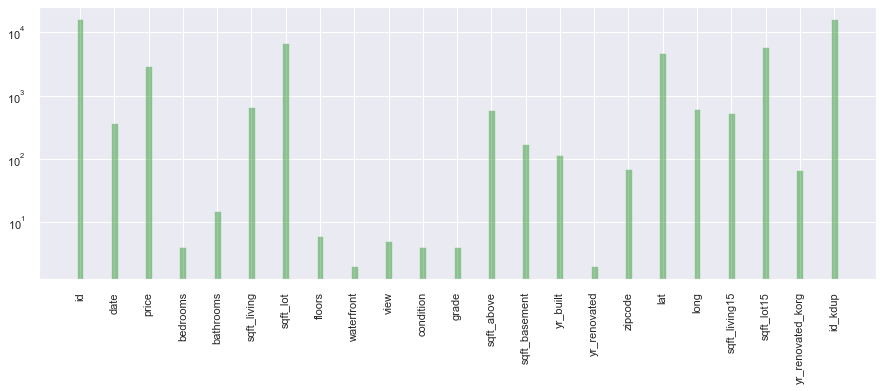

In [34]:
unique_features_plt(kc11)

## understand data

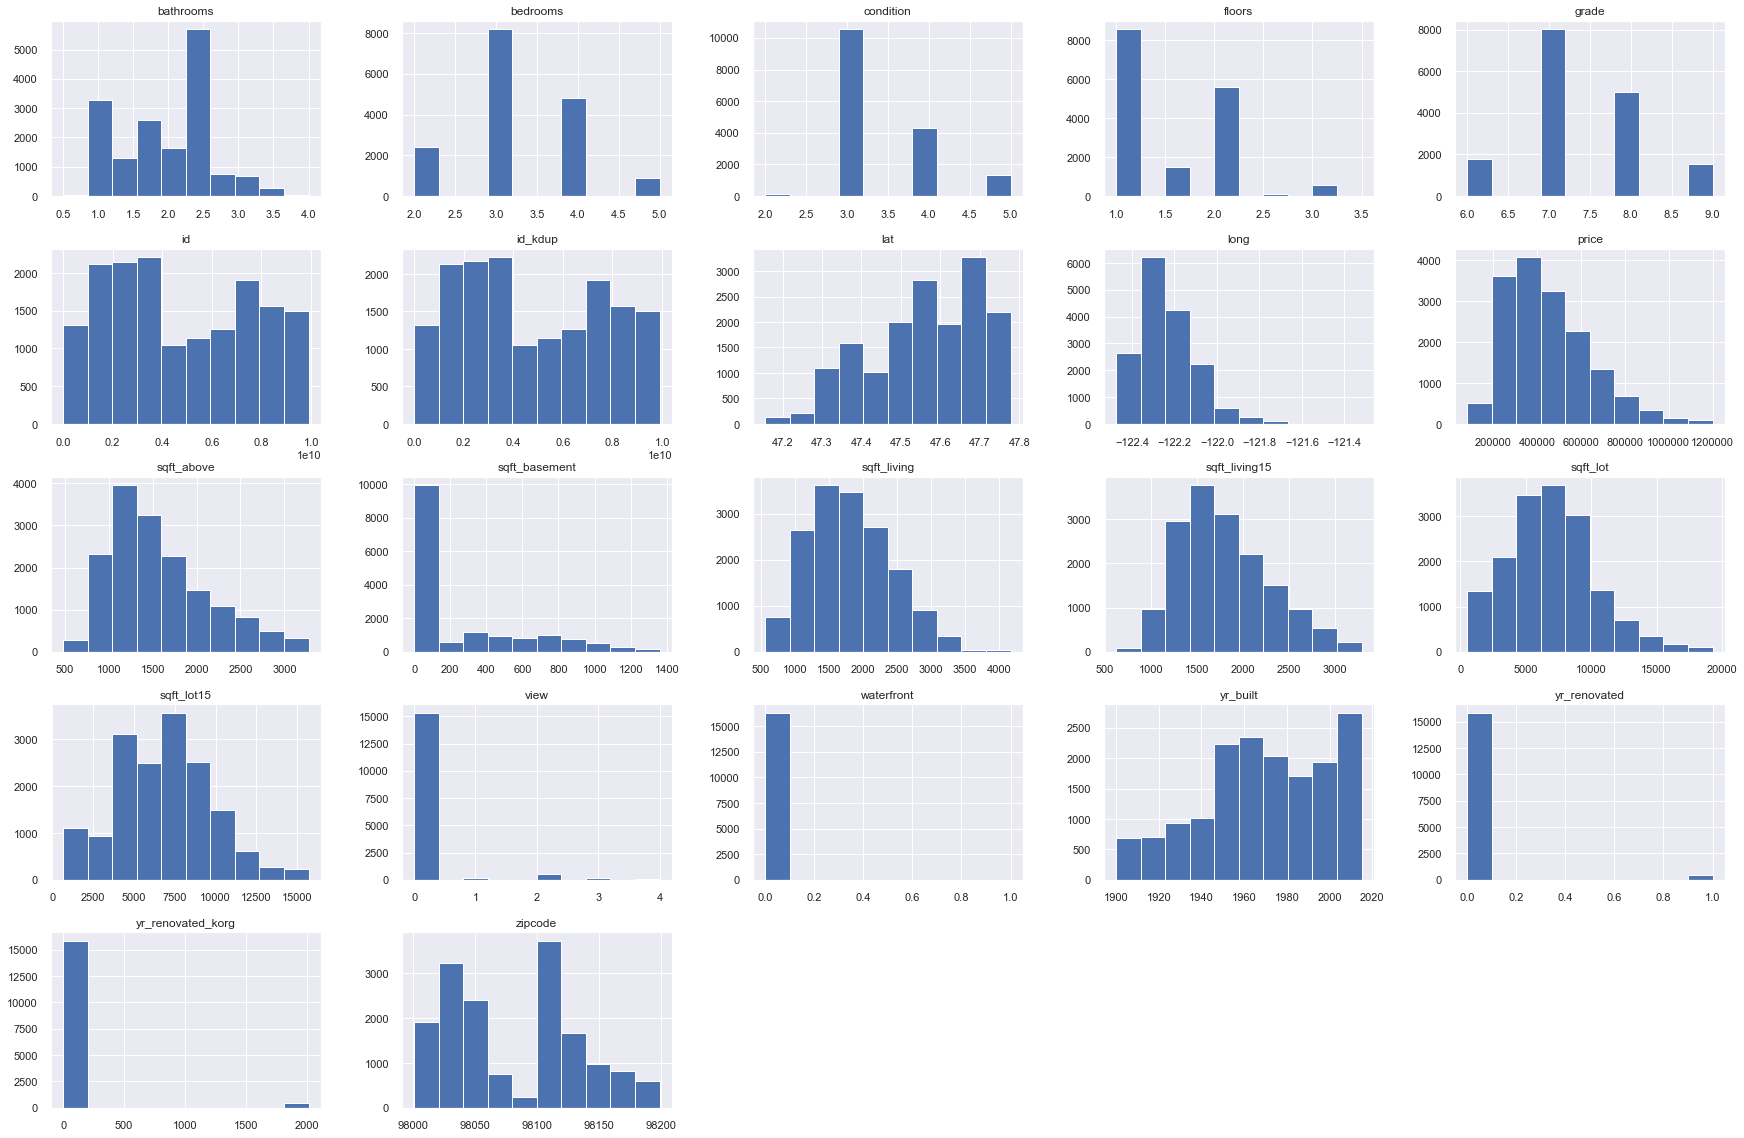

In [38]:
kc11.hist(figsize=(30,20))
plt.show()

##  inspect features

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots for the nearest 15 neighbors

### continuous features

In [42]:
selcols = list(col for col in kc11.columns if (col != 'id') & (col != 'date'))
kc12 = kc11.loc[:, selcols]
kc13_cont = kc12.loc[:, (kc12.dtypes != 'object') & (kc12.nunique() > 20)]
print(kc13_cont.shape)
kc13_cont.head()

(16319, 13)


,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_korg,id_kdup
0,221900.0,1180,5650,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0.0,7129300520
1,538000.0,2570,7242,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1991.0,6414100192
2,180000.0,770,10000,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0.0,5631500400
3,604000.0,1960,5000,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0.0,2487200875
4,510000.0,1680,8080,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0.0,1954400510


price AxesSubplot(0.125,0.657941;0.168478x0.222059)
sqft_living AxesSubplot(0.327174,0.657941;0.168478x0.222059)
sqft_lot AxesSubplot(0.529348,0.657941;0.168478x0.222059)
sqft_above AxesSubplot(0.731522,0.657941;0.168478x0.222059)
sqft_basement AxesSubplot(0.125,0.391471;0.168478x0.222059)
yr_built AxesSubplot(0.327174,0.391471;0.168478x0.222059)
zipcode AxesSubplot(0.529348,0.391471;0.168478x0.222059)
lat AxesSubplot(0.731522,0.391471;0.168478x0.222059)
long AxesSubplot(0.125,0.125;0.168478x0.222059)
sqft_living15 AxesSubplot(0.327174,0.125;0.168478x0.222059)
sqft_lot15 AxesSubplot(0.529348,0.125;0.168478x0.222059)
yr_renovated_korg AxesSubplot(0.731522,0.125;0.168478x0.222059)


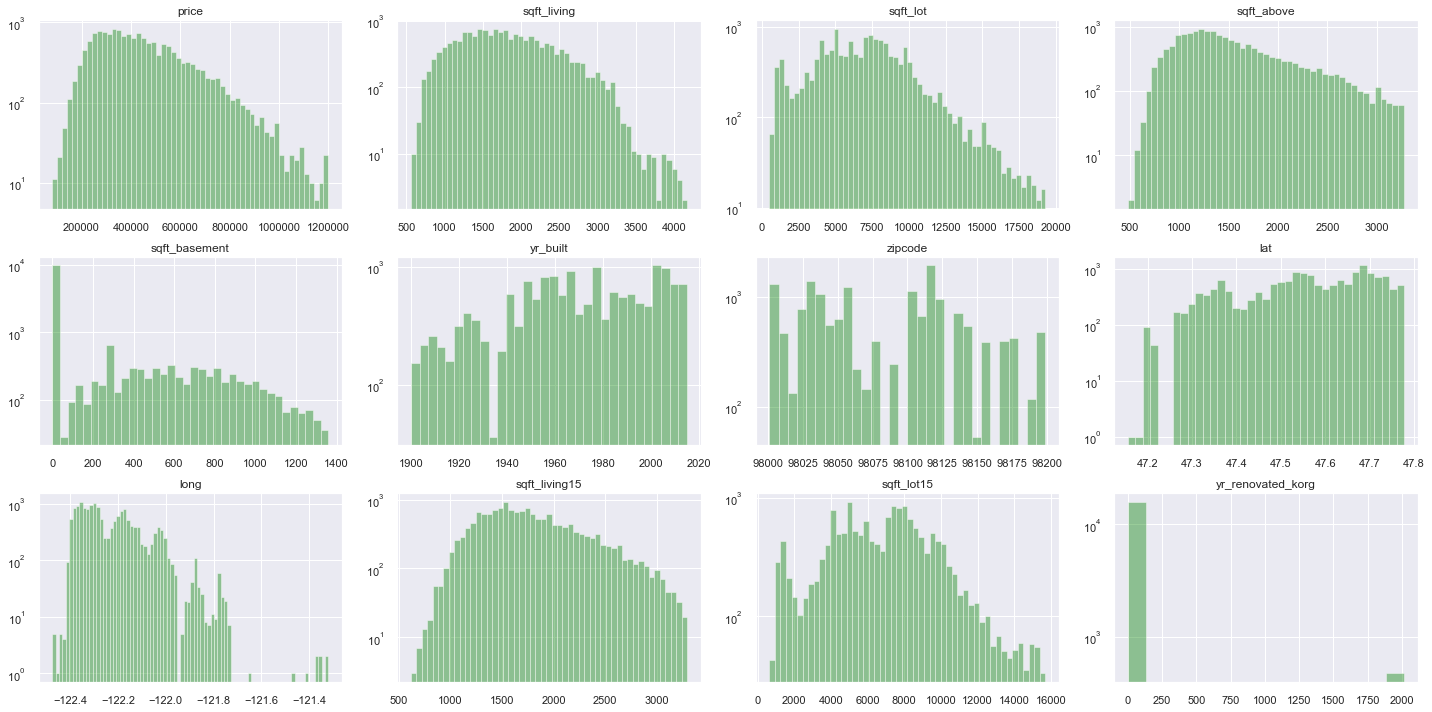

In [44]:
fig, axes = plt.subplots(nrows=kc13_cont.shape[1] // 4, ncols=4, figsize=(20,10))
continuous = list(col for col in kc13_cont.columns)
for xcol, ax in zip(continuous, axes.flatten()):
    print(xcol,ax)
    ax.hist(kc12_cont[xcol], bins='auto', alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig.tight_layout()

In [58]:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
             'yr_built','zipcode']
kc14_cont = kc13_cont.loc[:,cont_cols]
kc14_cont['sqft_tot'] = kc14_cont['sqft_above'] + kc14_cont['sqft_basement']
kc14_cont = kc14_cont.drop(['sqft_above','sqft_basement'],axis=1)
print(kc14_cont.shape)
kc14_cont.head()

(16319, 6)


,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_tot
0,221900.0,1180,5650,1340,5650,1180.0
1,538000.0,2570,7242,1690,7639,2570.0
2,180000.0,770,10000,2720,8062,770.0
3,604000.0,1960,5000,1360,5000,1960.0
4,510000.0,1680,8080,1800,7503,1680.0


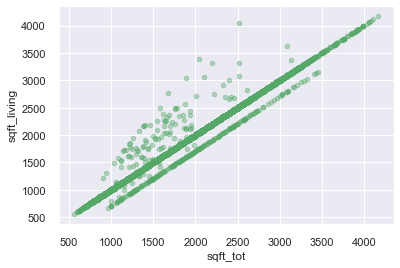

In [56]:
kc14_cont.plot(kind='scatter',x='sqft_tot',y='sqft_living',c='g',alpha=0.4)

In [59]:
kc14_cont = kc14_cont.drop(['sqft_tot'],axis=1)
print(kc14_cont.shape)
kc14_cont.head()

(16319, 5)


,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1340,5650
1,538000.0,2570,7242,1690,7639
2,180000.0,770,10000,2720,8062
3,604000.0,1960,5000,1360,5000
4,510000.0,1680,8080,1800,7503


### categoricals features

## check linearity

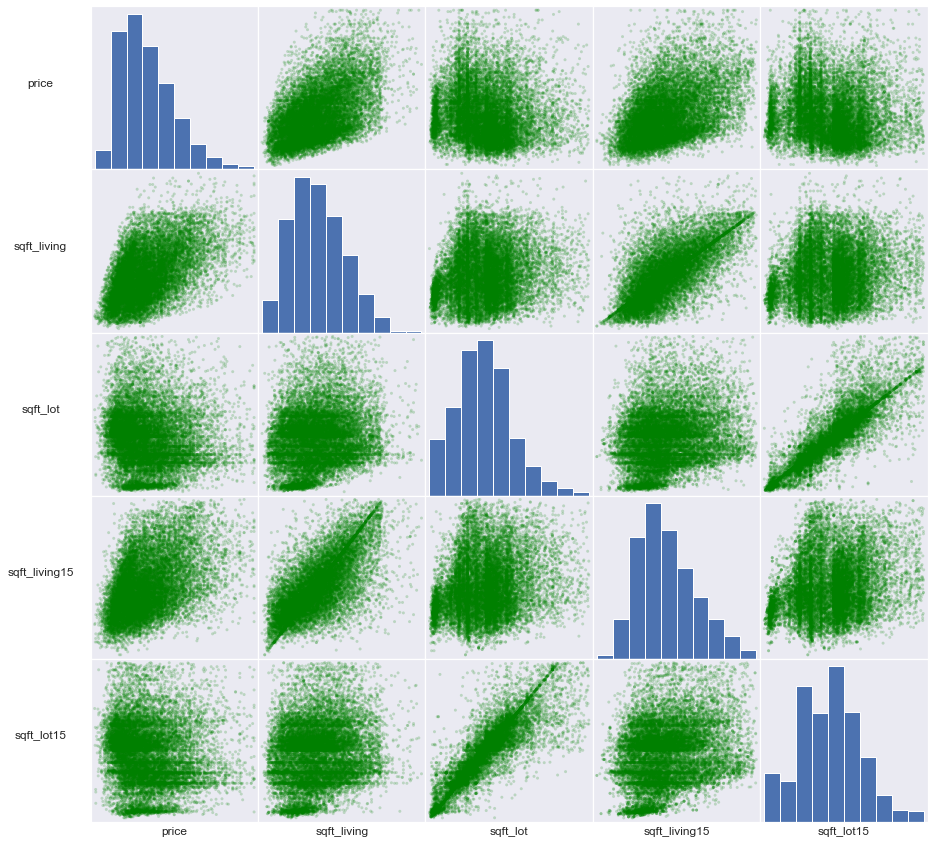

In [64]:
# Your code here 
sm = pd.plotting.scatter_matrix(kc14_cont, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [66]:
kc14_cont.corr()

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
price,1.000000,0.512244,-0.089257,0.434334,-0.100993
sqft_living,0.512244,1.000000,0.166807,0.694065,0.149108
sqft_lot,-0.089257,0.166807,1.000000,0.212731,0.875662
sqft_living15,0.434334,0.694065,0.212731,1.000000,0.231834
sqft_lot15,-0.100993,0.149108,0.875662,0.231834,1.000000


In [ ]:
cc_df = kc14_cont.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc_df.head())
cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))
ccpairs_df = cc_df.set_index('pairs')
ccpairs_df.columns = ['cc']
ccpairs_df = ccpairs_df.drop_duplicates()
ccpairs_df.head()

## build baseline model

## check normality

## check  homoscedasticity

## investigate multicollinearity

# EDA Q1:

# EDA Q2:

# modeling data

## remove uninfluential features